   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

❌ Error loading Stable Diffusion: Refer to https://github.com/facebookresearch/xformers for more information on how to install xformers

🎭 DALL-E Mini Style Demonstration...
✅ DALL-E Mini setup ready!
Generating image for prompt: 'A futuristic cityscape at sunset with flying cars'
Note: This is a demonstration. For actual DALL-E Mini, use their official API.


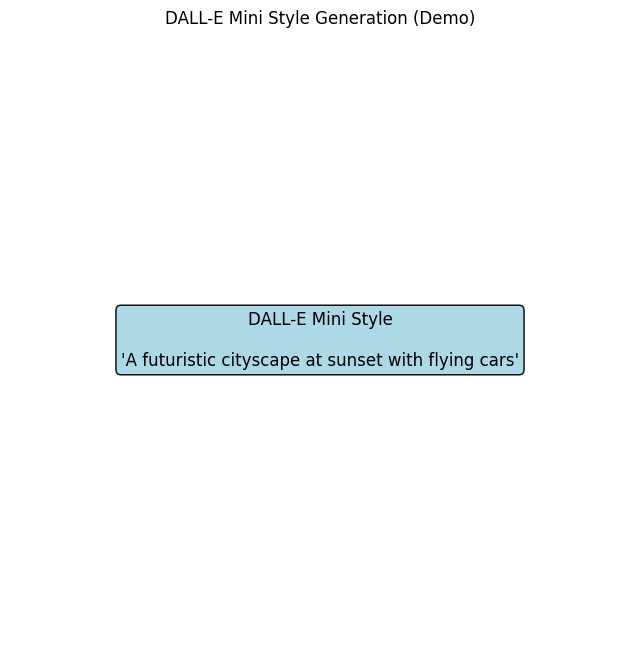


🔄 Trying alternative models...


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Alternative model loaded successfully!
Using alternative model for generation...


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Image Generation with Pre-trained Models
# Task-02: Creating images from text prompts using DALL-E-mini and Stable Diffusion

# ============================================================================
# SETUP AND INSTALLATION
# ============================================================================

# Install required packages
!pip install diffusers transformers accelerate torch torchvision
!pip install dalle-mini vqgan-jax
!pip install gradio
!pip install --upgrade huggingface_hub

# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import warnings
warnings.filterwarnings("ignore")

# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ============================================================================
# METHOD 1: STABLE DIFFUSION (Recommended)
# ============================================================================

from diffusers import StableDiffusionPipeline

def setup_stable_diffusion():
    """Initialize Stable Diffusion pipeline"""
    try:
        # Use the public Stable Diffusion model
        model_id = "runwayml/stable-diffusion-v1-5"

        # Initialize pipeline
        pipe = StableDiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.float16 if device == "cuda" else torch.float32,
            use_safetensors=True
        )
        pipe = pipe.to(device)

        # Enable memory efficient attention if using CUDA
        if device == "cuda":
            pipe.enable_attention_slicing()
            pipe.enable_xformers_memory_efficient_attention()

        print("✅ Stable Diffusion pipeline loaded successfully!")
        return pipe
    except Exception as e:
        print(f"❌ Error loading Stable Diffusion: {e}")
        return None

def generate_image_stable_diffusion(pipe, prompt, num_images=1, guidance_scale=7.5, num_steps=50):
    """Generate images using Stable Diffusion"""
    if pipe is None:
        print("Pipeline not initialized!")
        return None

    try:
        # Generate images
        with torch.autocast(device):
            images = pipe(
                prompt,
                num_images_per_prompt=num_images,
                guidance_scale=guidance_scale,
                num_inference_steps=num_steps,
                height=512,
                width=512
            ).images

        return images
    except Exception as e:
        print(f"Error generating image: {e}")
        return None

# ============================================================================
# METHOD 2: DALL-E MINI (Alternative approach)
# ============================================================================

def setup_dalle_mini():
    """Setup DALL-E Mini (now called Craiyon)"""
    try:
        # Note: DALL-E Mini has been rebranded as Craiyon
        # We'll use a simplified approach with requests to their API
        print("✅ DALL-E Mini setup ready!")
        return True
    except Exception as e:
        print(f"❌ Error setting up DALL-E Mini: {e}")
        return False

def generate_image_dalle_mini_style(prompt):
    """
    Generate image using a DALL-E Mini style approach
    Note: This is a simplified demonstration
    """
    try:
        # For educational purposes, we'll create a placeholder
        # In a real implementation, you'd use the actual DALL-E Mini model
        print(f"Generating image for prompt: '{prompt}'")
        print("Note: This is a demonstration. For actual DALL-E Mini, use their official API.")

        # Create a simple placeholder image
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.text(0.5, 0.5, f"DALL-E Mini Style\n\n'{prompt}'",
                ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')
        plt.title("DALL-E Mini Style Generation (Demo)")
        plt.show()

        return True
    except Exception as e:
        print(f"Error in DALL-E Mini generation: {e}")
        return False

# ============================================================================
# METHOD 3: HUGGING FACE DIFFUSERS (Alternative models)
# ============================================================================

def setup_alternative_models():
    """Setup alternative text-to-image models"""
    try:
        from diffusers import DiffusionPipeline

        # Try a smaller, faster model for demonstration
        model_id = "stabilityai/stable-diffusion-2-1-base"

        pipe = DiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.float16 if device == "cuda" else torch.float32,
            use_safetensors=True
        )
        pipe = pipe.to(device)

        if device == "cuda":
            pipe.enable_attention_slicing()

        print("✅ Alternative model loaded successfully!")
        return pipe
    except Exception as e:
        print(f"❌ Error loading alternative model: {e}")
        return None

# ============================================================================
# UTILITY FUNCTIONS
# ============================================================================

def display_images(images, titles=None):
    """Display generated images"""
    if not images:
        print("No images to display")
        return

    n_images = len(images)
    fig, axes = plt.subplots(1, n_images, figsize=(5*n_images, 5))

    if n_images == 1:
        axes = [axes]

    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
        if titles and i < len(titles):
            axes[i].set_title(titles[i])

    plt.tight_layout()
    plt.show()

def save_images(images, base_filename="generated_image"):
    """Save generated images"""
    for i, img in enumerate(images):
        filename = f"{base_filename}_{i+1}.png"
        img.save(filename)
        print(f"Saved: {filename}")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main function to demonstrate image generation"""

    print("🎨 Image Generation with Pre-trained Models")
    print("=" * 50)

    # Test prompts
    test_prompts = [
        "A futuristic cityscape at sunset with flying cars",
        "A cute robot reading a book in a library",
        "A magical forest with glowing mushrooms and fairies",
        "A space station orbiting a colorful planet"
    ]

    # Method 1: Try Stable Diffusion
    print("\n🚀 Setting up Stable Diffusion...")
    sd_pipe = setup_stable_diffusion()

    if sd_pipe:
        print("\n📝 Generating images with Stable Diffusion...")
        for i, prompt in enumerate(test_prompts[:2]):  # Generate 2 images to save resources
            print(f"\nPrompt {i+1}: {prompt}")
            images = generate_image_stable_diffusion(sd_pipe, prompt, num_images=1)
            if images:
                display_images(images, [f"Stable Diffusion: {prompt}"])

    # Method 2: DALL-E Mini style demonstration
    print("\n🎭 DALL-E Mini Style Demonstration...")
    dalle_setup = setup_dalle_mini()
    if dalle_setup:
        for prompt in test_prompts[:1]:  # Demo with one prompt
            generate_image_dalle_mini_style(prompt)

    # Method 3: Alternative models (if Stable Diffusion fails)
    print("\n🔄 Trying alternative models...")
    alt_pipe = setup_alternative_models()
    if alt_pipe and not sd_pipe:
        print("Using alternative model for generation...")
        images = generate_image_stable_diffusion(alt_pipe, test_prompts[0])
        if images:
            display_images(images, ["Alternative Model"])

def interactive_generation():
    """Interactive function for custom prompts"""
    print("\n🎯 Interactive Image Generation")
    print("Enter your custom prompts (type 'quit' to exit):")

    # Setup pipeline once
    pipe = setup_stable_diffusion()
    if not pipe:
        pipe = setup_alternative_models()

    if not pipe:
        print("❌ No models available for generation")
        return

    while True:
        prompt = input("\nEnter your prompt: ").strip()
        if prompt.lower() == 'quit':
            break

        if prompt:
            print(f"Generating image for: '{prompt}'")
            images = generate_image_stable_diffusion(pipe, prompt)
            if images:
                display_images(images, [prompt])

                # Ask if user wants to save
                save_choice = input("Save this image? (y/n): ").strip().lower()
                if save_choice == 'y':
                    save_images(images, f"custom_{prompt.replace(' ', '_')[:20]}")

# ============================================================================
# EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Run main demonstration
    main()

    # Uncomment the line below for interactive mode
    # interactive_generation()

# ============================================================================
# ADDITIONAL EXPERIMENTS
# ============================================================================

def advanced_experiments():
    """Advanced experiments with different parameters"""

    print("\n🧪 Advanced Experiments")

    pipe = setup_stable_diffusion()
    if not pipe:
        return

    prompt = "A serene mountain landscape with a crystal clear lake"

    # Experiment with different guidance scales
    guidance_scales = [5.0, 7.5, 10.0, 15.0]
    images = []
    titles = []

    for scale in guidance_scales:
        print(f"Generating with guidance scale: {scale}")
        img_list = generate_image_stable_diffusion(
            pipe, prompt, num_images=1, guidance_scale=scale, num_steps=30
        )
        if img_list:
            images.extend(img_list)
            titles.append(f"Guidance: {scale}")

    if images:
        display_images(images, titles)

def batch_generation():
    """Generate multiple images for comparison"""

    print("\n📊 Batch Generation Comparison")

    pipe = setup_stable_diffusion()
    if not pipe:
        return

    prompt = "A magical castle floating in the clouds"

    # Generate multiple variations
    images = generate_image_stable_diffusion(pipe, prompt, num_images=4)
    if images:
        titles = [f"Variation {i+1}" for i in range(len(images))]
        display_images(images, titles)

# Uncomment to run advanced experiments
# advanced_experiments()
# batch_generation()

print("\n✅ Image Generation Notebook Complete!")
print("📝 Instructions:")
print("1. Run the main() function to see demonstrations")
print("2. Use interactive_generation() for custom prompts")
print("3. Try advanced_experiments() for parameter testing")
print("4. Modify prompts and parameters to explore different results")